In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

#booster number is no longer available from official dataset...
post_vacc_inf = pd.read_csv("../data/covid19postvaxstatewidestats.csv")

vacc_prog = pd.read_csv("../data/covid19vaccinesbycounty.csv")

## Post-Vaccination_Infection_Data study

In [2]:
# This table shows stats of california state infection data respect to vaccination
post_vacc_inf

,date,area,area_type,unvaccinated_cases,vaccinated_cases,unvaccinated_hosp,vaccinated_hosp,unvaccinated_deaths,vaccinated_deaths,population_unvaccinated,population_vaccinated,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k
0,2021-02-01,California,State,14601,24,779,1,12,0,36192255,338385,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,California,State,12073,21,601,0,15,0,36075564,372611,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,California,State,11012,26,556,0,18,0,35940521,409171,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-04,California,State,9658,17,487,0,19,0,35776707,430461,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-05,California,State,8978,16,506,1,28,0,35613292,446131,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2022-08-27,California,State,1554,2857,91,127,5,12,6024506,28690476,44.226507,15.465560,1.946810,0.608465,0.196815,0.060747
573,2022-08-28,California,State,1450,2650,97,150,11,21,6023173,28691326,43.439373,15.229590,1.947241,0.605957,0.206346,0.060247
574,2022-08-29,California,State,3134,5197,122,190,9,15,6019300,28694254,41.684961,14.700305,1.936628,0.602410,0.177999,0.058747
575,2022-08-30,California,State,2840,4255,133,166,18,15,6015804,28697002,40.581204,14.132885,1.933004,0.575471,0.187601,0.060235


In [3]:
# It is a daily data from 2021-02-01 to 2022-02-13
# March 2022 data also available online
post_vacc_inf['date'].value_counts()

2021-10-24    1
2022-06-29    1
2022-05-27    1
2022-03-19    1
2021-09-04    1
             ..
2022-05-30    1
2022-08-10    1
2022-07-03    1
2022-06-11    1
2022-03-20    1
Name: date, Length: 577, dtype: int64

In [4]:
# Check for missing data
for column in post_vacc_inf.columns:
    count = post_vacc_inf[column].isnull().sum()
    if count > 0:
      print(f'{column} has {count} missing data')
    
# the reason of missing data are the first 6 days without vaccine and first 193 days bootster not released
## We should fill data with 0 in preprocessing

unvaccinated_cases_per_100k has 6 missing data
vaccinated_cases_per_100k has 6 missing data
unvaccinated_hosp_per_100k has 6 missing data
vaccinated_hosp_per_100k has 6 missing data
unvaccinated_deaths_per_100k has 6 missing data
vaccinated_deaths_per_100k has 6 missing data


In [5]:
# Data type on the table looks already cleaned
post_vacc_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          577 non-null    object 
 1   area                          577 non-null    object 
 2   area_type                     577 non-null    object 
 3   unvaccinated_cases            577 non-null    int64  
 4   vaccinated_cases              577 non-null    int64  
 5   unvaccinated_hosp             577 non-null    int64  
 6   vaccinated_hosp               577 non-null    int64  
 7   unvaccinated_deaths           577 non-null    int64  
 8   vaccinated_deaths             577 non-null    int64  
 9   population_unvaccinated       577 non-null    int64  
 10  population_vaccinated         577 non-null    int64  
 11  unvaccinated_cases_per_100k   571 non-null    float64
 12  vaccinated_cases_per_100k     571 non-null    float64
 13  unvac

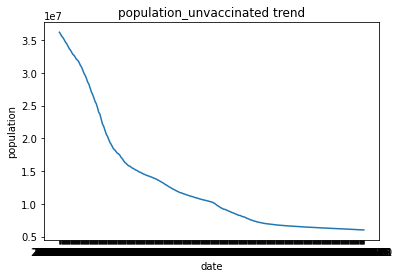

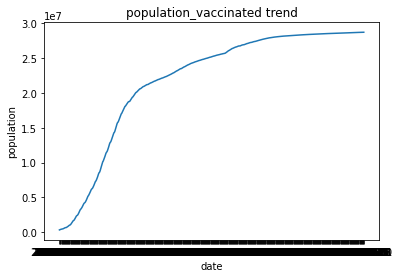

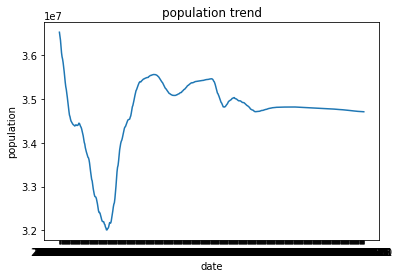

In [7]:
plt.plot(post_vacc_inf['date'], post_vacc_inf['population_unvaccinated'])
plt.title('population_unvaccinated trend')
plt.xlabel('date')
plt.ylabel('population')
plt.show()

plt.plot(post_vacc_inf['date'], post_vacc_inf['population_vaccinated'])
plt.title('population_vaccinated trend')
plt.xlabel('date')
plt.ylabel('population')
plt.show()

# plt.plot(post_vacc_inf['date'], post_vacc_inf['population_boosted'])
# plt.title('population_boosted trend')
# plt.xlabel('date')
# plt.ylabel('population')
# plt.show()

plt.plot(post_vacc_inf['date'], post_vacc_inf['population_unvaccinated'] + post_vacc_inf['population_vaccinated'])
plt.title('population trend')
plt.xlabel('date')
plt.ylabel('population')
plt.show()


In [8]:
(post_vacc_inf['population_unvaccinated'] + post_vacc_inf['population_vaccinated']).head()

0    36530640
1    36448175
2    36349692
3    36207168
4    36059423
dtype: int64

In [9]:
total_pop = (post_vacc_inf['population_unvaccinated'] + post_vacc_inf['population_vaccinated'])
post_vacc_inf.loc[(total_pop.min() == total_pop)]['date']

# Population droped until 2021-05-02, it could be people moving out of state/death/etc.

90    2021-05-02
Name: date, dtype: object

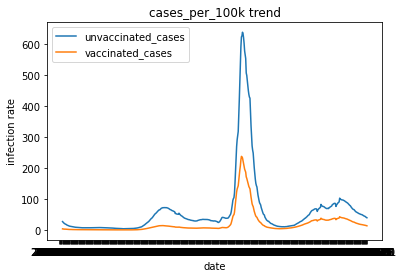

In [10]:
# Comparasion of infection rate between unvaccinated, unvaccinated, and boosted.

plt.plot(post_vacc_inf['date'], post_vacc_inf['unvaccinated_cases_per_100k'], label='unvaccinated_cases')
plt.plot(post_vacc_inf['date'], post_vacc_inf['vaccinated_cases_per_100k'], label='vaccinated_cases')
# plt.plot(post_vacc_inf['date'], post_vacc_inf['boosted_cases_per_100k'], label='boosted_cases')
plt.title('cases_per_100k trend')
plt.xlabel('date')
plt.ylabel('infection rate')
plt.legend()
plt.show()

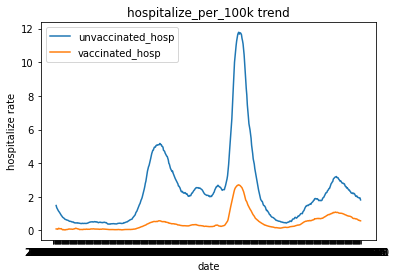

In [11]:
# Comparasion of hospitalize rate between unvaccinated, unvaccinated, and boosted.

plt.plot(post_vacc_inf['date'], post_vacc_inf['unvaccinated_hosp_per_100k'], label='unvaccinated_hosp')
plt.plot(post_vacc_inf['date'], post_vacc_inf['vaccinated_hosp_per_100k'], label='vaccinated_hosp')
# plt.plot(post_vacc_inf['date'], post_vacc_inf['boosted_hosp_per_100k'], label='boosted_hosp')
plt.title('hospitalize_per_100k trend')
plt.xlabel('date')
plt.ylabel('hospitalize rate')
plt.legend()
plt.show()

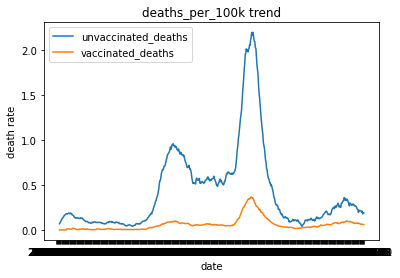

In [12]:
# Comparasion of death rate between unvaccinated, unvaccinated, and boosted.

plt.plot(post_vacc_inf['date'], post_vacc_inf['unvaccinated_deaths_per_100k'], label='unvaccinated_deaths')
plt.plot(post_vacc_inf['date'], post_vacc_inf['vaccinated_deaths_per_100k'], label='vaccinated_deaths')
# plt.plot(post_vacc_inf['date'], post_vacc_inf['boosted_deaths_per_100k'], label='boosted_deaths')
plt.title('deaths_per_100k trend')
plt.xlabel('date')
plt.ylabel('death rate')
plt.legend()
plt.show()

https://www.cdc.gov/flu/about/burden/2017-2018.htm#:~:text=The%20overall%20burden%20of%20flu,related%20deaths%20(Table%201).

According to CDC data for 2017-2018 flu has following rate:
- Case per 100k: (18,957,179/41,043,550) * 100,000 = 46187
- Hosp per 100k: (710,572/41,043,550) * 100,000 = 1731
- Death per 100k: (51,646/41,043,550) * 100,000 = 125

Here is the data from our California Dataset:
- Case per 100k (Max): 800~
- Hosp per 100k (Max): 16~
- Death per 100k (Max): 2.5~